## LGG09 with real eigenvalues

In [57]:
using ReachabilityAnalysis, LinearAlgebra, Plots

In [72]:
n = 2
A = [1.3 1.4; 1.4 0.5]

2×2 Array{Float64,2}:
 1.3  1.4
 1.4  0.5

In [226]:
X0 = Hyperrectangle(ones(2), 0.1 * ones(2))
ivp = @ivp(x' = A*x, x(0) ∈ X0, x ∈ Universe(2))
δ = 0.08
alg = StepIntersect(Forward(inv=true))

ivpd = discretize(ivp, δ, alg)

Ω₀ = initial_state(ivpd)
Ω₀c = concretize(Ω₀)
Ω₀_box = box_approximation(Ω₀);
Φ = state_matrix(ivpd)

2×2 Array{Float64,2}:
 1.11642   0.120634
 0.120634  1.04749

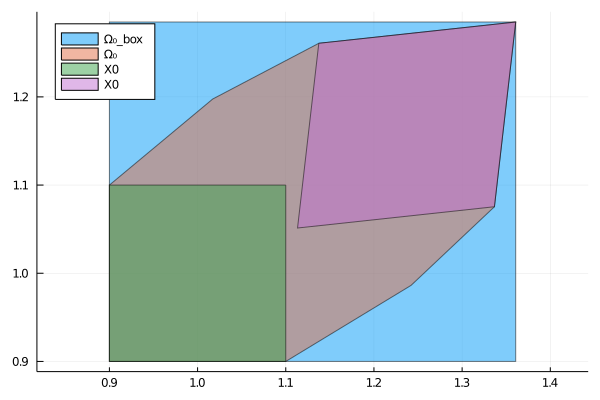

In [227]:
fig = plot(legend=:topleft, ratio=1.)
plot!(fig, Ω₀_box, lab="Ω₀_box")
plot!(fig, concretize(Ω₀), lab="Ω₀")
plot!(X0, lab="X0")
plot!(Φ * X0, lab="X0")

## Support function along the eigenbasis

In [228]:
using ReachabilityAnalysis: reach_homog_eig_LGG09

In [229]:
# we take δ = 1
Λ, P = eigen(A .* δ) 

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 -0.044481758228488266
  0.18848175822848828
vectors:
2×2 Array{Float64,2}:
  0.602196  -0.798349
 -0.798349  -0.602196

In [230]:
P * transpose(P)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [231]:
Q = transpose(inv(P)) # it is P in this case

2×2 Transpose{Float64,Array{Float64,2}}:
  0.602196  -0.798349
 -0.798349  -0.602196

In [233]:
NSTEPS = 5
ρmat = reach_homog_eig_LGG09(Λ, Q, Ω₀, NSTEPS)

4×5 Array{Float64,2}:
 -0.0255539  -0.0244422  -0.0233788  -0.0223616  -0.0213887
 -1.26049    -1.52193    -1.83761    -2.21875    -2.67896
  0.349684    0.334471    0.319919    0.306       0.292687
  1.86014     2.24596     2.71181     3.27428     3.95342

In [235]:
ρmat = reach_homog_eig_LGG09(Λ, Q, Ω₀c, NSTEPS) # more precise

4×5 Array{Float64,2}:
 -0.0393932  -0.0376793  -0.03604   -0.034472  -0.0329723
 -1.26049    -1.52193    -1.83761   -2.21875   -2.67896
  0.343577    0.328629    0.314331   0.300656   0.287575
  1.86014     2.24596     2.71181    3.27428    3.95342

In [236]:
[ρ(Q[:, 1], Φ^k * Ω₀) for k in 0:4]

5-element Array{Float64,1}:
 -0.025553931163034567
 -0.02444215750810031
 -0.023378753736137334
 -0.022361615420971363
 -0.02138872969359787

In [237]:
[ρ(Q[:, 2], Φ^k * Ω₀) for k in 0:4]

5-element Array{Float64,1}:
 -1.2604897451344326
 -1.5219342979687194
 -1.8376063877350346
 -2.2187536221185846
 -2.678956531998174

In [238]:
[ρ(-Q[:, 1], Φ^k * Ω₀) for k in 0:4]

5-element Array{Float64,1}:
 0.3496842887487675
 0.3344705912047413
 0.3199187952685607
 0.3060001036187851
 0.292686971817655

In [239]:
[ρ(-Q[:, 2], Φ^k * Ω₀) for k in 0:4]

5-element Array{Float64,1}:
 1.8601419197395461
 2.2459633627872644
 2.7118099825893816
 3.274280205775545
 3.9534152225874806

In [240]:
M = zeros(2*n, NSTEPS)
M[1, :] = [ρ(Q[:, 1], Φ^k * Ω₀) for k in 0:NSTEPS-1]
M[2, :] = [ρ(Q[:, 2], Φ^k * Ω₀) for k in 0:NSTEPS-1]
M[3, :] = [ρ(-Q[:, 1], Φ^k * Ω₀) for k in 0:NSTEPS-1]
M[4, :] = [ρ(-Q[:, 2], Φ^k * Ω₀) for k in 0:NSTEPS-1];

In [241]:
opnorm(M - ρmat)

0.031068405717780988

In [242]:
M

4×5 Array{Float64,2}:
 -0.0255539  -0.0244422  -0.0233788  -0.0223616  -0.0213887
 -1.26049    -1.52193    -1.83761    -2.21875    -2.67896
  0.349684    0.334471    0.319919    0.306       0.292687
  1.86014     2.24596     2.71181     3.27428     3.95342

In [243]:
ρmat

4×5 Array{Float64,2}:
 -0.0393932  -0.0376793  -0.03604   -0.034472  -0.0329723
 -1.26049    -1.52193    -1.83761   -2.21875   -2.67896
  0.343577    0.328629    0.314331   0.300656   0.287575
  1.86014     2.24596     2.71181    3.27428    3.95342

## Representation of rotated boxes

We begin by visualizing the reach-sets obtained with the eigenbasis.

In [244]:
Q * Q'

2×2 Array{Float64,2}:
 1.0          5.55112e-17
 5.55112e-17  1.0

In [245]:
Q

2×2 Transpose{Float64,Array{Float64,2}}:
  0.602196  -0.798349
 -0.798349  -0.602196

In [246]:
M = vcat(Q', -Q')
X = [HPolytope(M, ρmat[:, k]) for k in 1:NSTEPS];

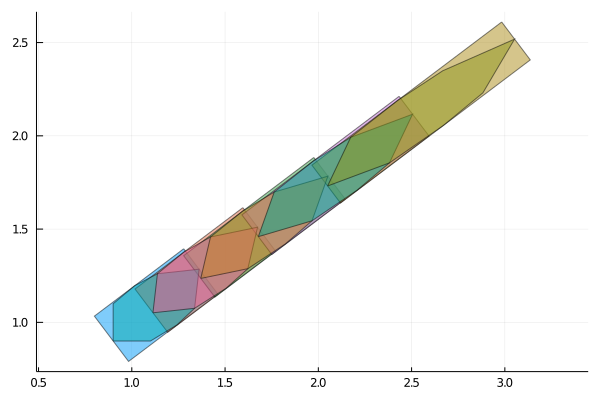

In [247]:
plot(X, ratio=1.)
plot!([Φ^k * Ω₀c for k in 0:NSTEPS-1])

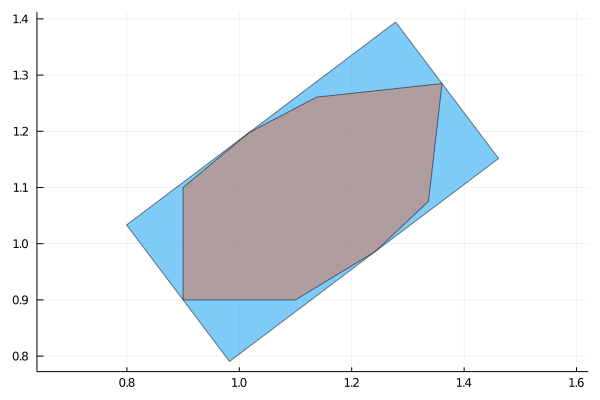

In [248]:
plot(X[1], ratio=1.)
plot!(Ω₀c)

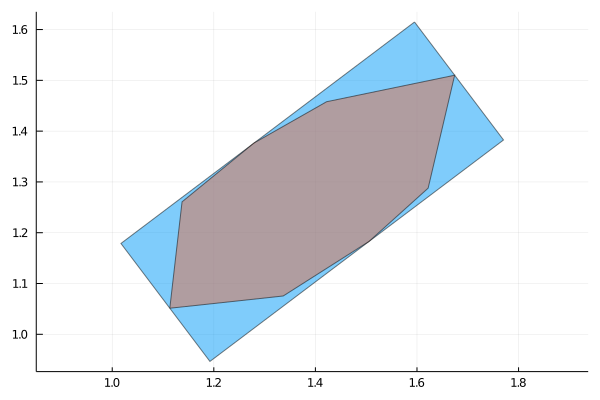

In [249]:
plot(X[2], ratio=1.)
plot!(Φ * Ω₀c)

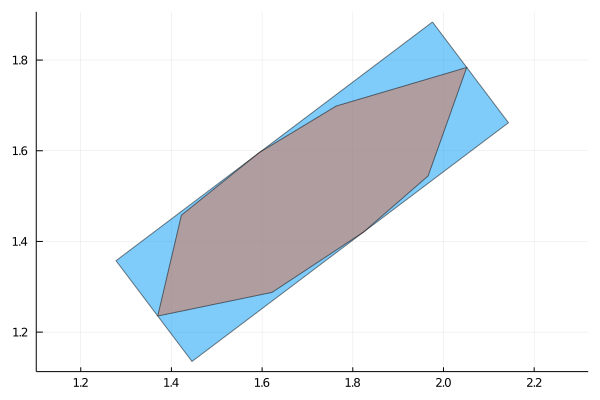

In [250]:
plot(X[3], ratio=1.)
plot!(Φ^2 * Ω₀c)

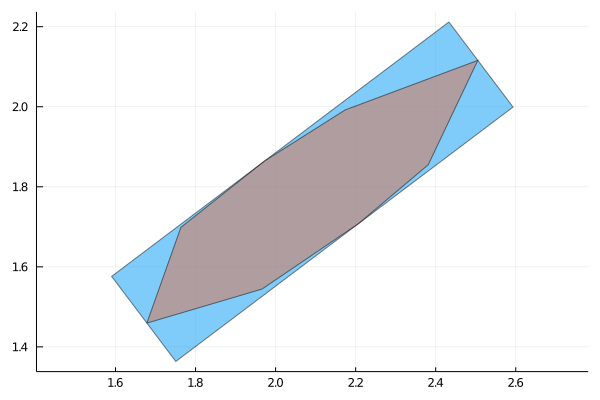

In [251]:
plot(X[4], ratio=1.)
plot!(Φ^3 * Ω₀c)

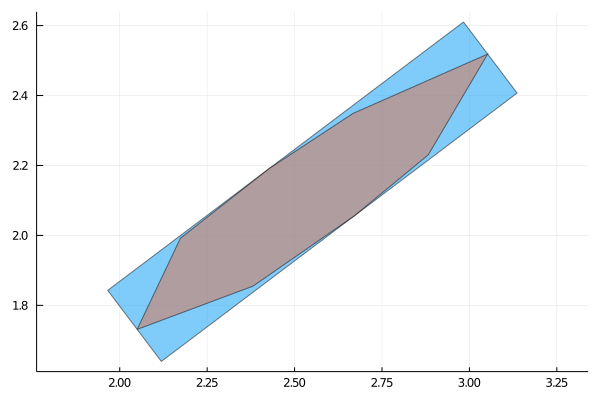

In [258]:
plot(X[5], ratio=1.)
plot!(Φ^4 * Ω₀c)

note that if we had used $Ω₀$ instead of $Ω₀c$ the parallelotope is not tight. That's because the $\rho$ over the lazy intersection from the discretized set is strict. this can be checked by using `ρmat = reach_homog_eig_LGG09(Λ, Q, Ω₀, NSTEPS)` above

## Computing tight box enclosures

the goal is to obtain tight box approximations of the $X_k$

In [260]:
Xbox = [box_approximation(Xk) for Xk in X];

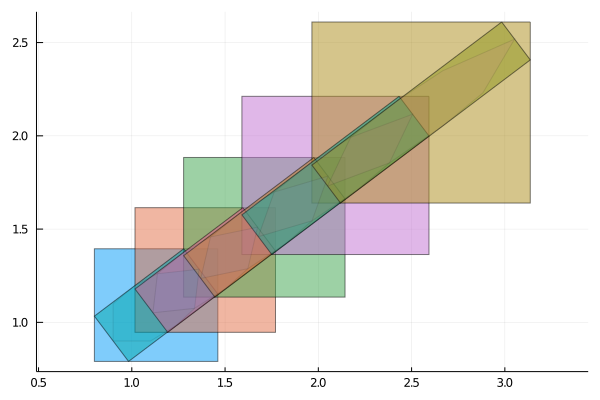

In [263]:
plot(Xbox, ratio=1.)
plot!(X, ratio=1.)
plot!([Φ^k * Ω₀c for k in 0:NSTEPS-1], alpha=.1)

idea: each parallelotope can be seen as a rotated box wrt the eigenbasis with lengths corresponding to the support functions

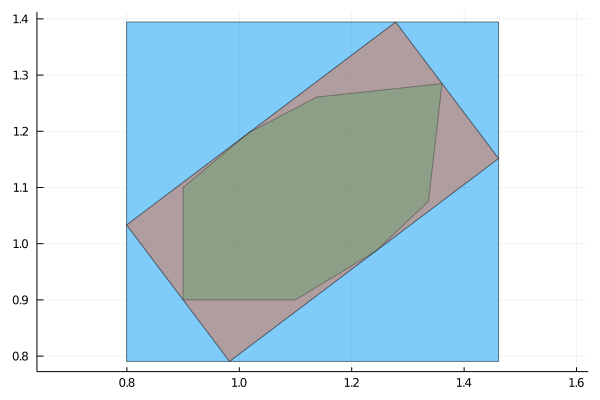

In [266]:
plot(Xbox[1:1], ratio=1.)
plot!(X[1:1], ratio=1.)
plot!([Φ^k * Ω₀c for k in 0:0], alpha=.3)

In [269]:
Q # eigenbasis of Φ^T

2×2 Transpose{Float64,Array{Float64,2}}:
  0.602196  -0.798349
 -0.798349  -0.602196

In [285]:
k = 1

c = Vector{Float64}(undef, 2)
r = Vector{Float64}(undef, 2)

for i in 1:2
    c[i] = (ρmat[i, k] - ρmat[i + n, k])/2
    r[i] = (ρmat[i, k] + ρmat[i + n, k])/2
end
H = Hyperrectangle(c, r)

Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([-0.19148496718707275, -1.5603158324369892], [0.15209175481491477, 0.29982608730255655])

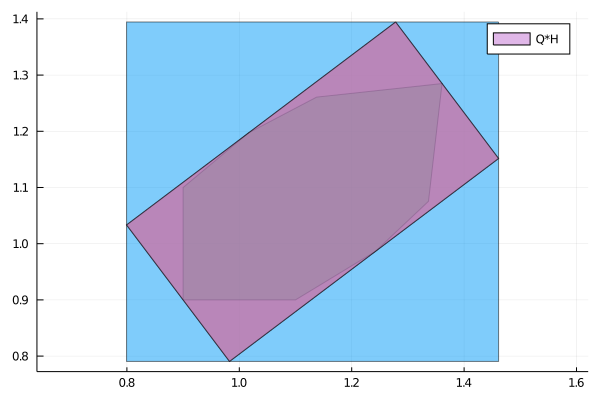

In [286]:
plot(Xbox[1:1], ratio=1.)
plot!(X[1:1], ratio=1.)
plot!([Φ^k * Ω₀c for k in 0:0], alpha=.3)

plot!(Q * H, lab="Q*H")

In [287]:
isequivalent(Q * H, X[1]) # yikes

true

In [288]:
cbox = Q * c
rbox = abs.(Q) * r
Ybox = Hyperrectangle(cbox, rbox)

Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([1.130364647385437, 1.0924869580701484], [0.33095472380372204, 0.3019761713433381])

In [289]:
isequivalent(Ybox, Xbox[1])

true